# Statistics and Analysis of Characters and Anime 

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import datetime
import ast

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [2]:
# Characters who appear >10 times in the fanfiction, their names gathered into a in a csv file. Converted to pandas DF.
characters = pd.read_csv('myhero_names_rev.csv')

# Archive of Our Own
AO3 = pd.read_csv('AO3.csv')
AO3['published'] = pd.to_datetime(AO3['published'])

# Series overview: Original season number, Number of episodes, First aired, and Last aired.
og_season_anime_airdate = pd.read_csv('og_air_clean.csv')

# Season 1 Episode number overall, Episode number in the season, Title, Storyboarded by, Directed by,
#     Written by, Original air date, and English air date.
season_one_anime = pd.read_csv('season_one_clean.csv')

# Season 2-6 Episode number overall, Episode number in the season, Title, Storyboarded by, Directed by,
#     Written by, Viewership rating, Original air date, and English air date.
season_two_anime = pd.read_csv('season_two_clean.csv')
season_three_anime = pd.read_csv('season_three_clean.csv')
season_four_anime = pd.read_csv('season_four_clean.csv')
season_five_anime = pd.read_csv('season_five_clean.csv')
season_six_anime = pd.read_csv('season_six_clean.csv')
season_six_anime['English_Air_Date'] = pd.to_datetime(season_six_anime['English_Air_Date'])

# Original Video Animation (OVA) titled "Save! Rescue Training!"
# Number (8 total released), Title, Storyboard by, Directed by, Written by, Original release date.
og_vid_animation_anime =  pd.read_csv('OVAs_clean.csv')

# Japan Home Video Release
# Season, Volume, Epsiodes, Release date.
Japan_homevid_release_anime = pd.read_csv('Japan_HV_clean.csv')

# Funimation/Crunchyroll (North America)
# Season, Volume, Episodes, Release date.
funimation_crunchyroll_anime = pd.read_csv('Fun_Crunch_NA_clean.csv')

# Universal Pictures/Manga Entertainment (UK and Ireland)
# Season, Volume, Episodes, Release date.
universalpictures_manga_anime = pd.read_csv('Up_Uk_clean.csv')

# Universal Sony/Madman Entertainment (Australia and New Zealand)
# Season, Volume, Episodes, Release date Universal, Release date Madman.
universalsony_madman_anime = pd.read_csv('Us_Me_clean.csv')

In [3]:
name_1 = [x for x in characters['1'].values]
name_2 = [x for x in (characters['2'].dropna().values)]
mhanames = name_1 + name_2


In [4]:
dont_want = ['Parents', 'Suffering', 'Loss Of His Will', 'Niece', 'mentioned', 'Family', 'Notebooks', 'Character', 'quirk', 'Friend', 'Eriks', 'Werewolf', 'Prototype', 'Mother', 'Sibling', 'Sidekicks', 'l Jade', 'Nezuko']

In [5]:
AO3['characters'] = AO3['characters'].apply(ast.literal_eval)

In [6]:
AO3['characters']

0                 [Dabi | Todoroki Touya, Kochou Shinobu]
1       [Midoriya Izuku, Dazai Osamu (Bungou Stray Dog...
2       [Power (Chainsaw Man), Ashido Mina, Iida Tenya...
3       [Midoriya Izuku, Midoriya Inko, Bakugou Katsuk...
4       [Bakugou Katsuki, Uraraka Ochako, Midoriya Izuku]
                              ...                        
1995    [Midoriya Izuku, Class 1-A (My Hero Academia),...
1996                    [Bakugou Katsuki, Midoriya Izuku]
1997    [Midoriya Izuku, Yagi Toshinori | All Might, T...
1998    [Mia Ikati, Rue Achlys, Ryuuji Takao, Itsumi M...
1999    [Midoriya Izuku, Sero Hanta, Bakugou Katsuki, ...
Name: characters, Length: 2000, dtype: object

In [7]:
for i, x in enumerate(AO3['characters']):
    names = []
    for xx in x:
        for n in mhanames:
            if n in xx:
                if xx not in names:
                    names.append(xx)
        for name in dont_want:
            if name in xx:
                if xx in names:
                    names.remove(xx)

    AO3['characters'][i] = names # Replace the original string with the new list
    

C:\Users\tessa\AppData\Local\Temp\ipykernel_18084\448749779.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AO3['characters'][i] = names # Replace the original string with the new list


In [8]:
AO3.shape

(2000, 7)

In [9]:
AO3.explode('characters')['characters'].value_counts()

Midoriya Izuku                1306
Bakugou Katsuki               1052
Aizawa Shouta | Eraserhead     813
Todoroki Shouto                630
Yagi Toshinori | All Might     521
                              ... 
Mei Hatsume                      1
Denki Kaminari                   1
Ochaco Uraraka                   1
Hanta Sero                       1
Kurama | Minamino Shuuichi       1
Name: characters, Length: 158, dtype: int64

In [10]:
AO3

,title,mixed fandom,ships,characters,hits,kudos,published
0,Purple poison flames meet Blue fire,['Fandoms:\n鬼滅の刃 | Demon Slayer: Kimetsu no Ya...,['Dabi | Todoroki Touya & Kochou Shinobu'],[Dabi | Todoroki Touya],0,NaN,2023-04-02
1,Stuck With Babysitter Duty,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,['Dazai Osamu/Nakahara Chuuya (Bungou Stray Do...,"[Midoriya Izuku, Bakugou Katsuki, Todoroki Sho...",0,NaN,2023-04-02
2,Power in UA!!!,"['Fandoms:\nChainsaw Man (Anime), 僕のヒーローアカデミア ...","['Bakugou Katsuki/Power', 'Power & Class 1-A']","[Ashido Mina, Iida Tenya, Aizawa Shouta | Eras...",508,7.0,2023-04-02
3,Balance and Bondeds,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,['Aizawa Shouta | Eraserhead/Yamada Hizashi | ...,"[Midoriya Izuku, Midoriya Inko, Bakugou Katsuk...",11924,481.0,2023-04-02
4,Can't Hold Our Babies,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,['Bakugou Katsuki/Midoriya Izuku/Uraraka Ochak...,"[Bakugou Katsuki, Uraraka Ochako, Midoriya Izuku]",0,NaN,2023-04-02
...,...,...,...,...,...,...,...
1995,Seeing double,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,"['Midoriya Izuku/Usagiyama Rumi | Miruko', 'Mi...",[Midoriya Izuku],14960,507.0,2023-03-28
1996,My Idol,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,['Bakugou Katsuki/Midoriya Izuku'],"[Bakugou Katsuki, Midoriya Izuku]",3348,234.0,2023-03-28
1997,Woodland Paths,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,['Midoriya Izuku & Yagi Toshinori | All Might'...,"[Midoriya Izuku, Yagi Toshinori | All Might, T...",4604,244.0,2023-03-28
1998,Boku No Hero Academia: Ones Way,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,[],"[Midoriya Izuku, Bakugou Katsuki, Todoroki Sho...",44,NaN,2023-03-28


In [11]:
characters['First'] = characters['1']
characters = characters.set_index('First')

In [12]:
def topchar(char, df):
    named = []
    for i in characters.loc[char]:
        if type(i) != float:
            named.append(i)
    df[char] = 0 
    for index, row in df.iterrows():
        for name in named:
            if row[char] == 0:
                if name in ''.join(row['characters']):
                    df.loc[index, char] = 1


In [13]:
topchar('Deku', AO3)
topchar('Katsuki', AO3)
topchar('Aizawa', AO3)
topchar('Todoroki Sho', AO3)
topchar('All Might', AO3)
topchar('Uraraka', AO3)
topchar('Shinsou Hitoshi', AO3)
topchar('Denki', AO3)
topchar('Inko', AO3)
topchar('Yamada Hizashi', AO3)
topchar('Dabi', AO3)
topchar('Mina', AO3)
topchar('Shigaraki Tomura', AO3)
topchar('Iida', AO3)
topchar('Keigo', AO3)

In [14]:
AO3 = AO3.rename(columns = {'Katsuki': 'Bakugo', 'Todoroki Sho': 'Shoto', 'Shinsou Hitoshi': 'Shinsou', 'Yamada Hizashi': 'Prez Mic'})

In [15]:
AO3.head()

,title,mixed fandom,ships,characters,hits,kudos,published,Deku,Bakugo,Aizawa,...,Uraraka,Shinsou,Denki,Inko,Prez Mic,Dabi,Mina,Shigaraki Tomura,Iida,Keigo
0,Purple poison flames meet Blue fire,['Fandoms:\n鬼滅の刃 | Demon Slayer: Kimetsu no Ya...,['Dabi | Todoroki Touya & Kochou Shinobu'],[Dabi | Todoroki Touya],0,NaN,2023-04-02,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Stuck With Babysitter Duty,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,['Dazai Osamu/Nakahara Chuuya (Bungou Stray Do...,"[Midoriya Izuku, Bakugou Katsuki, Todoroki Sho...",0,NaN,2023-04-02,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Power in UA!!!,"['Fandoms:\nChainsaw Man (Anime), 僕のヒーローアカデミア ...","['Bakugou Katsuki/Power', 'Power & Class 1-A']","[Ashido Mina, Iida Tenya, Aizawa Shouta | Eras...",508,7.0,2023-04-02,0,1,1,...,1,0,1,0,0,0,1,0,1,0
3,Balance and Bondeds,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,['Aizawa Shouta | Eraserhead/Yamada Hizashi | ...,"[Midoriya Izuku, Midoriya Inko, Bakugou Katsuk...",11924,481.0,2023-04-02,1,1,1,...,0,1,0,1,1,0,0,0,0,0
4,Can't Hold Our Babies,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,['Bakugou Katsuki/Midoriya Izuku/Uraraka Ochak...,"[Bakugou Katsuki, Uraraka Ochako, Midoriya Izuku]",0,NaN,2023-04-02,1,1,0,...,1,0,0,0,0,0,0,0,0,0


In [16]:
characters[:30]

,1,2
First,,
Aizawa,Aizawa,NaN
Deku,Deku,Izuku
Katsuki,Katsuki,NaN
Todoroki Sho,Todoroki Sho,NaN
All Might,All Might,NaN
Uraraka,Uraraka,NaN
Shinsou Hitoshi,Shinsou Hitoshi,NaN
Denki,Denki,NaN
Yamada Hizashi,Yamada Hizashi,NaN


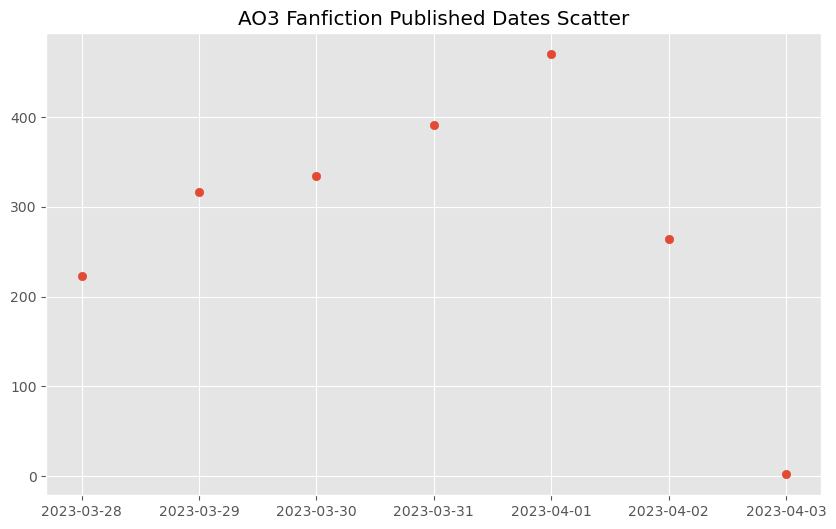

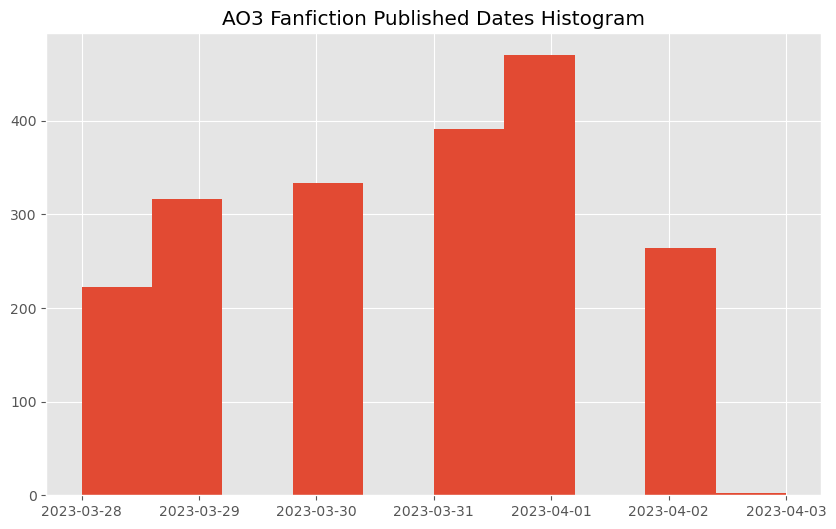

title                 0
mixed fandom          0
ships                 0
characters            0
hits                  0
kudos               100
published             0
Deku                  0
Bakugo                0
Aizawa                0
Shoto                 0
All Might             0
Uraraka               0
Shinsou               0
Denki                 0
Inko                  0
Prez Mic              0
Dabi                  0
Mina                  0
Shigaraki Tomura      0
Iida                  0
Keigo                 0
dtype: int64

In [17]:
date_counts = pd.DataFrame(AO3['published'].value_counts())
plt.scatter(x=date_counts.index, y='published',data=date_counts, marker='o')
plt.title('AO3 Fanfiction Published Dates Scatter')
plt.show()

AO3['published'].hist()
plt.title('AO3 Fanfiction Published Dates Histogram')
plt.show()

AO3.isna().sum()

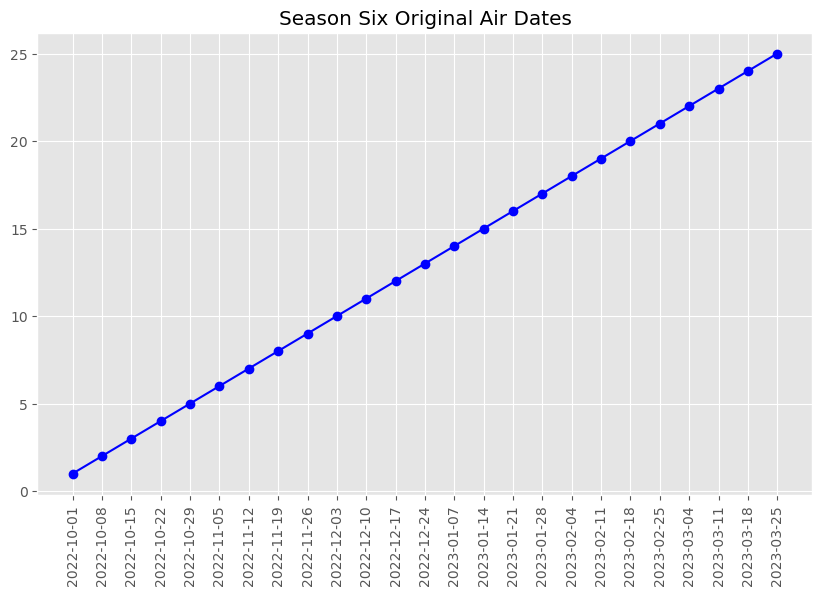

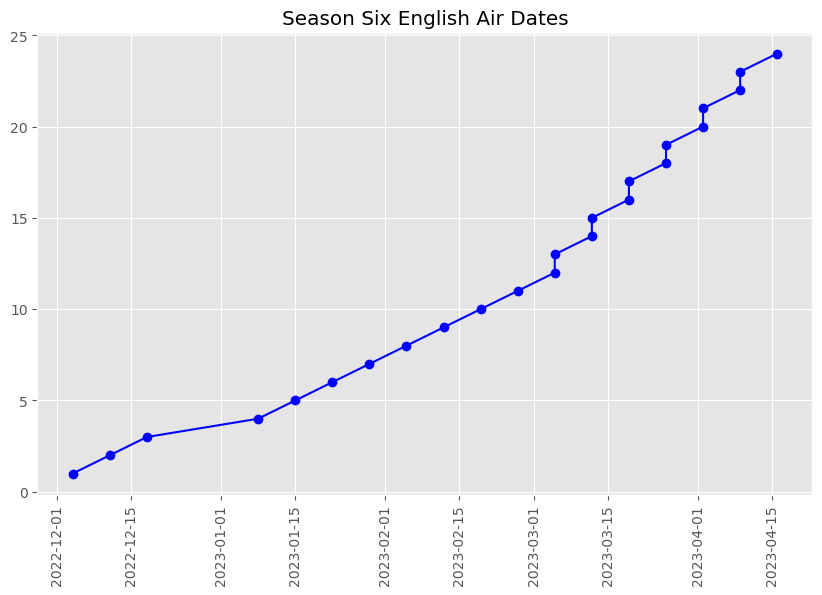

In [18]:
plt.plot('Original_Air_Date', 'No. inseason',data=season_six_anime, color='blue', marker='o')
plt.title('Season Six Original Air Dates')
plt.xticks(rotation=90)
plt.show()

plt.plot('English_Air_Date','No. inseason', data=season_six_anime, color='blue', marker='o')
plt.title('Season Six English Air Dates')
plt.xticks(rotation=90)
plt.show()


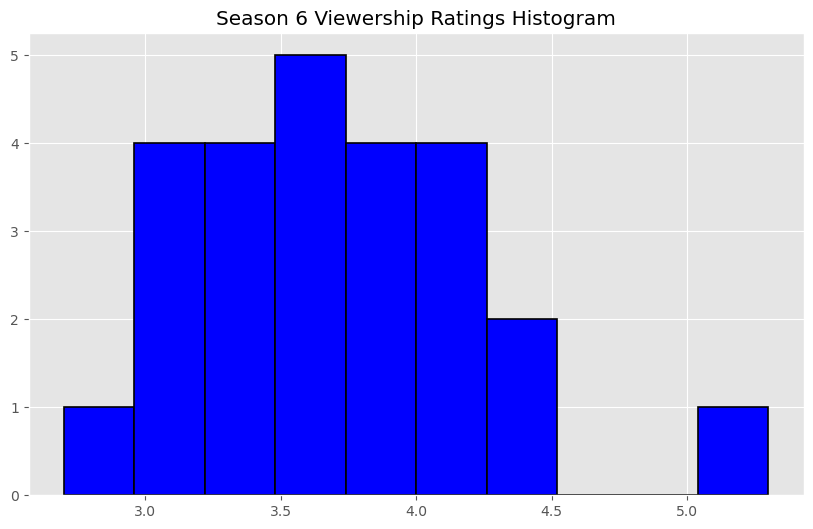

In [19]:
plt.hist(x='Viewership rating', data=season_six_anime, bins=10, color='blue', edgecolor='black', linewidth=1.2)
plt.title('Season 6 Viewership Ratings Histogram')
plt.show()

In [20]:
# Obtaining just the characters presence or absence in the fanfiction.
character_presence = AO3.iloc[:,6:]

# Verifying the maximum number is 1, to ensure the binary coding worked. 
check = character_presence.describe()
check 

character_presence.set_index('published', inplace=True)
character_presence

,Deku,Bakugo,Aizawa,Shoto,All Might,Uraraka,Shinsou,Denki,Inko,Prez Mic,Dabi,Mina,Shigaraki Tomura,Iida,Keigo
published,,,,,,,,,,,,,,,
2023-04-02,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2023-04-02,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2023-04-02,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0
2023-04-02,1,1,1,0,0,0,1,0,1,1,0,0,0,0,0
2023-04-02,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-03-28,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-03-28,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0


In [21]:
character_presence.apply(pd.Series.value_counts)

,Deku,Bakugo,Aizawa,Shoto,All Might,Uraraka,Shinsou,Denki,Inko,Prez Mic,Dabi,Mina,Shigaraki Tomura,Iida,Keigo
0,686,942,1184,1366,1475,1526,1588,1627,1639,1631,1622,1665,1691,1707,1737
1,1314,1058,816,634,525,474,412,373,361,369,378,335,309,293,263


### The top three most frequently used characters in fanfiction are Deku, Bakugo, and Aizawa.

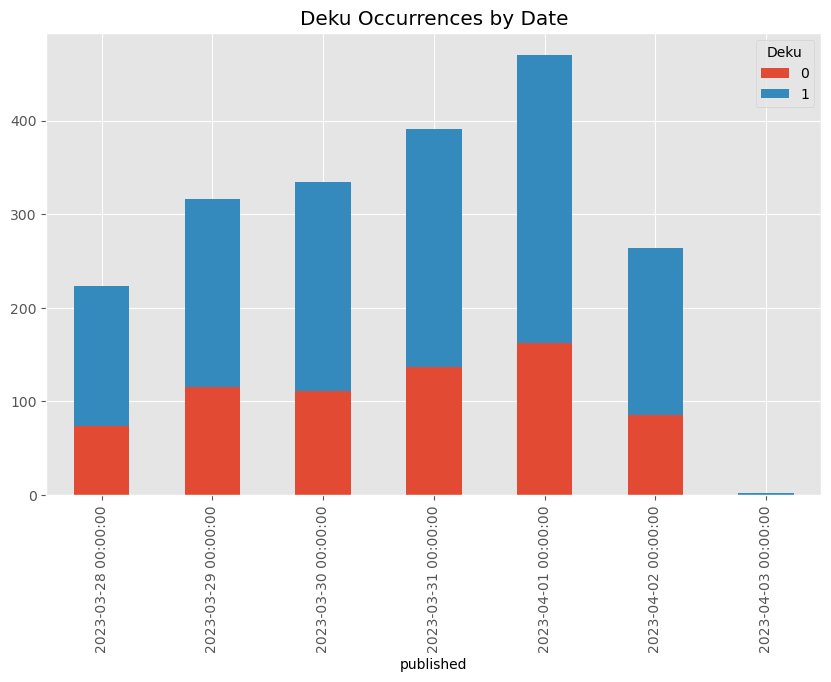

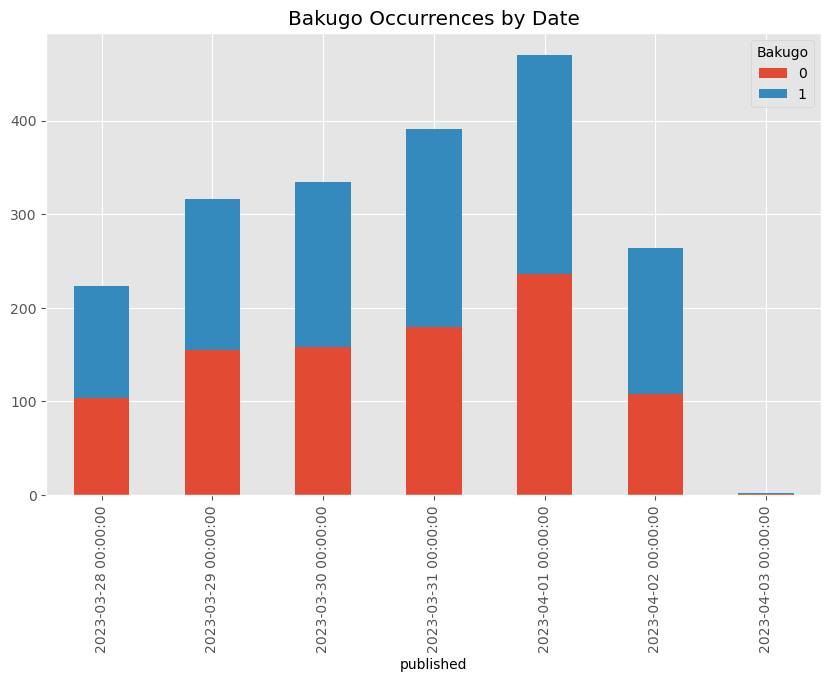

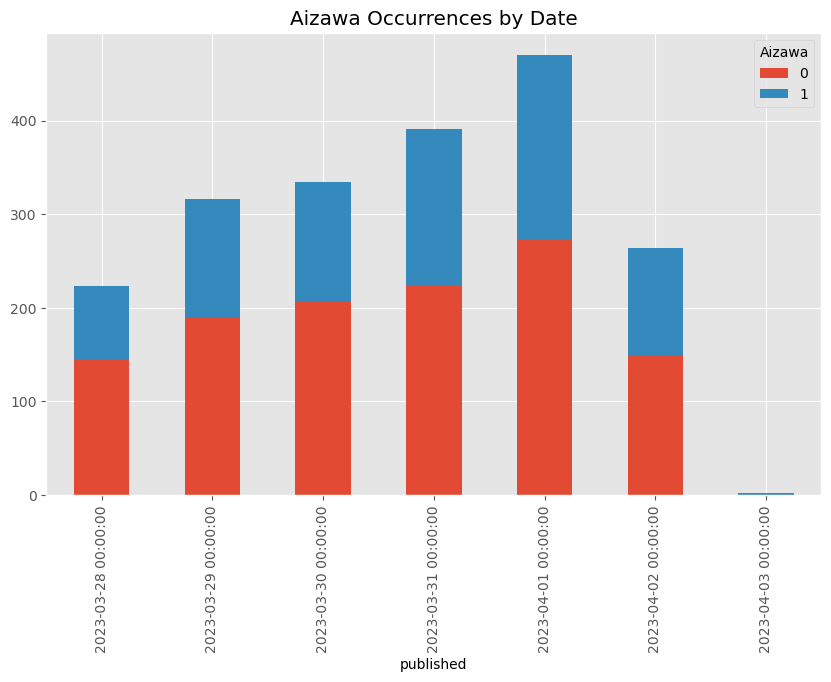

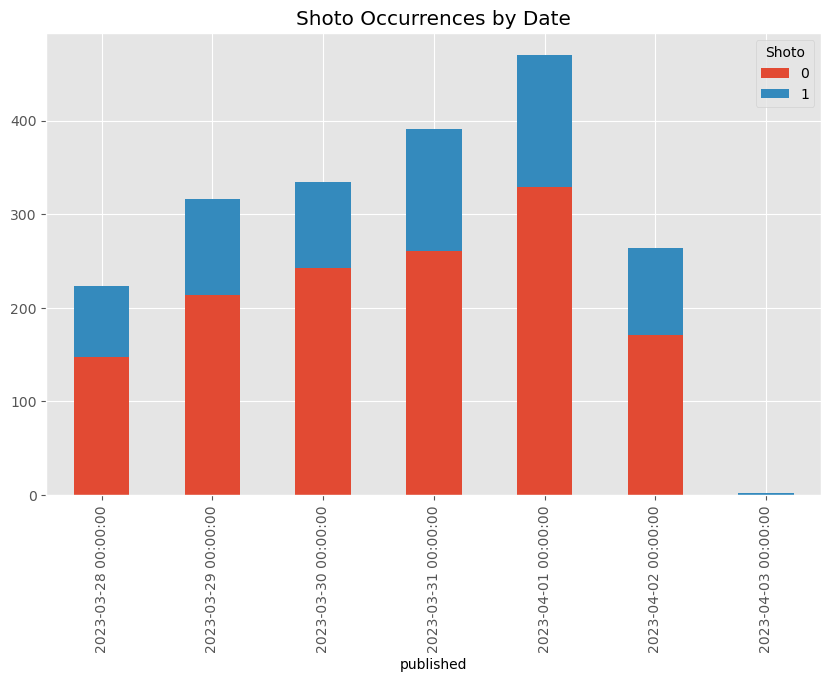

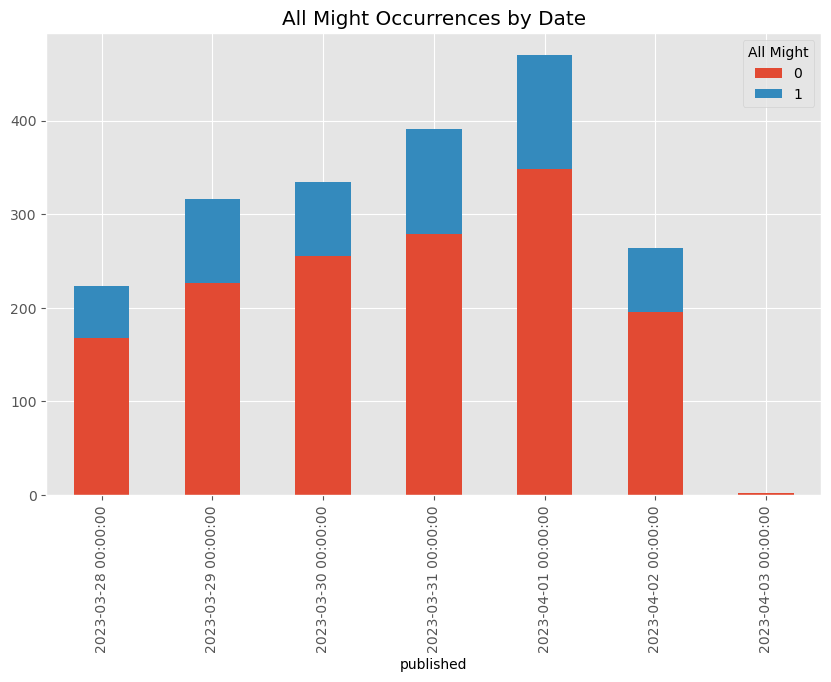

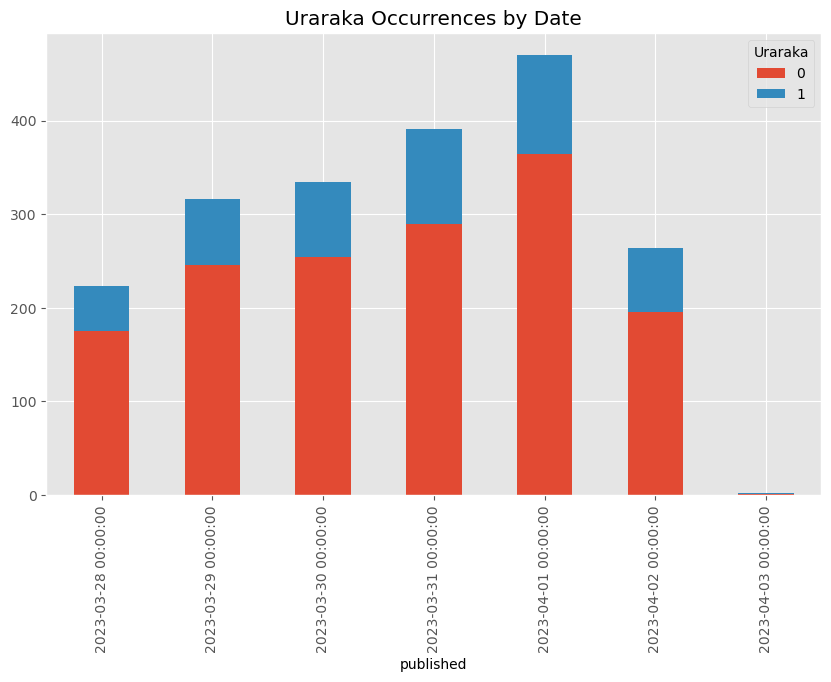

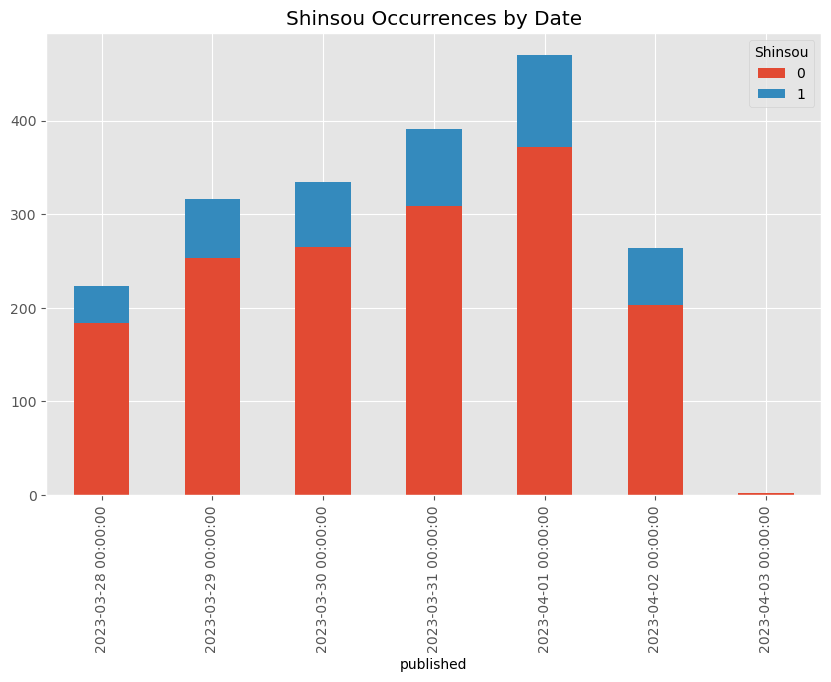

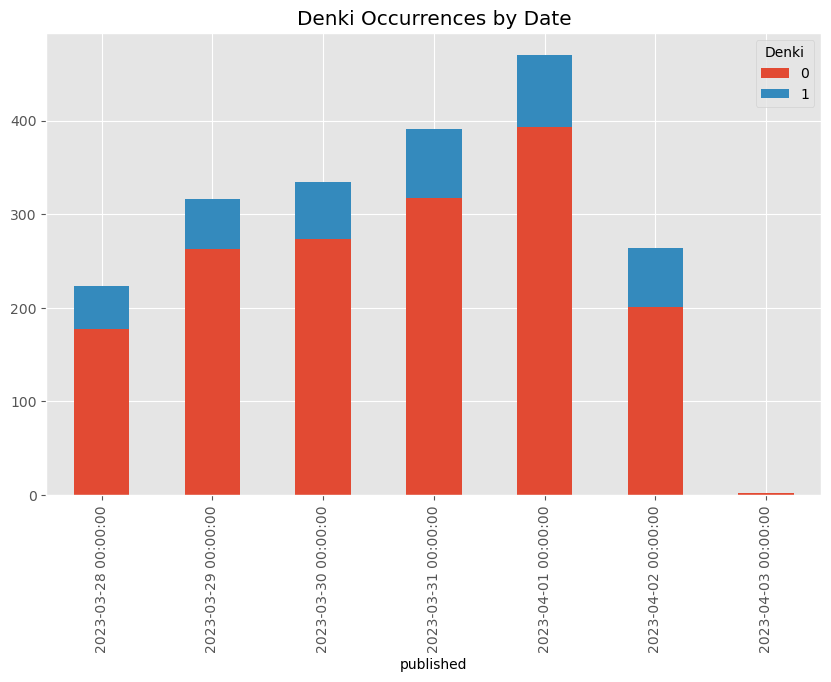

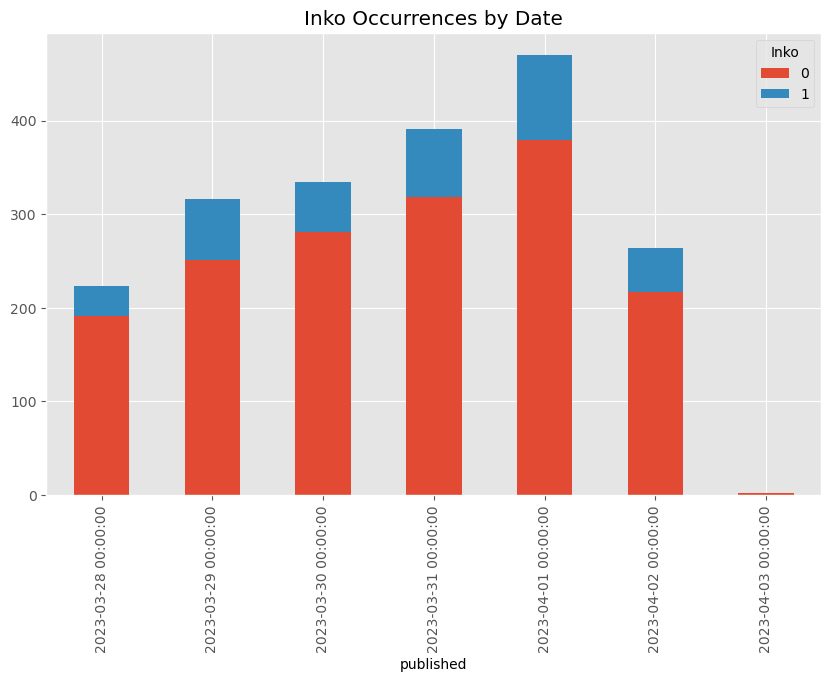

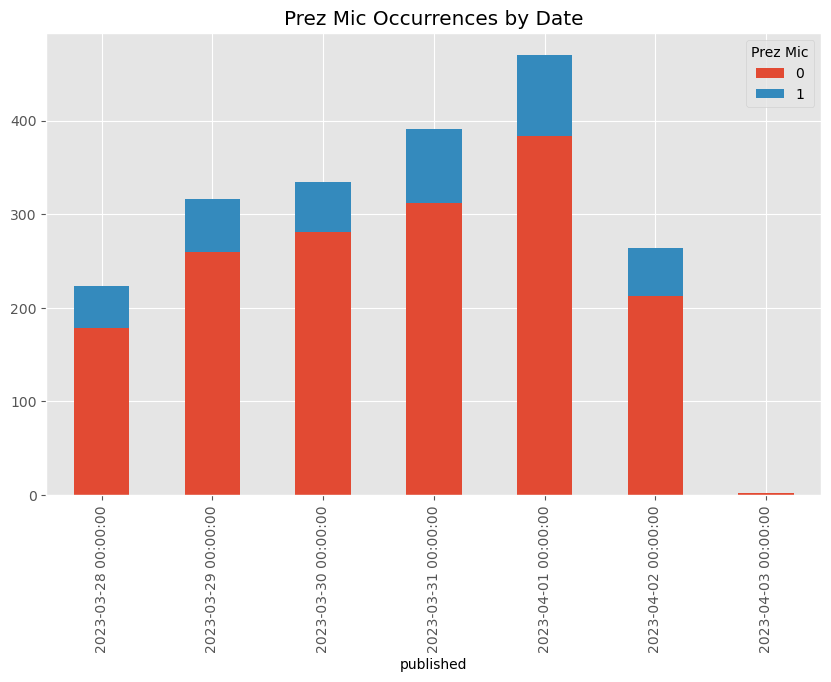

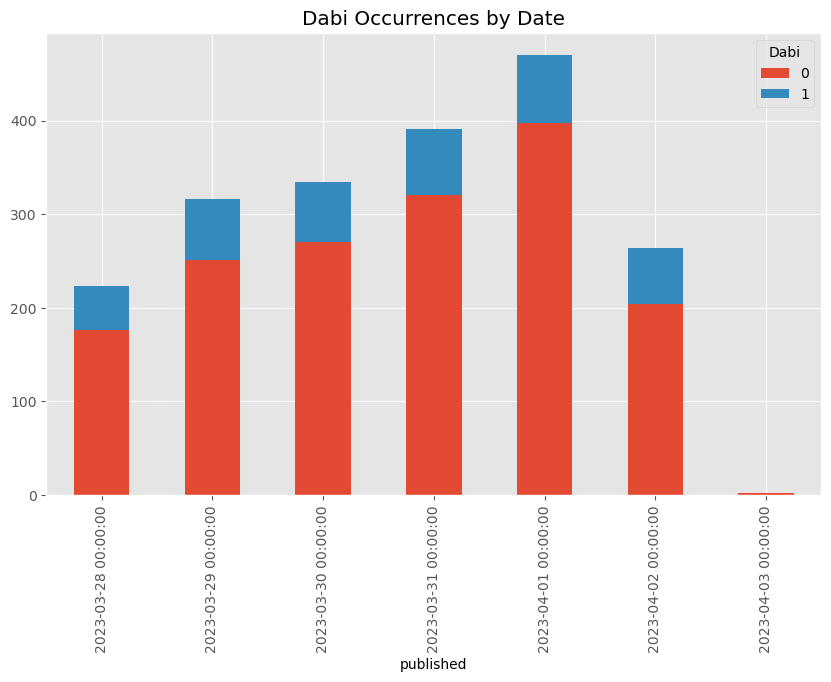

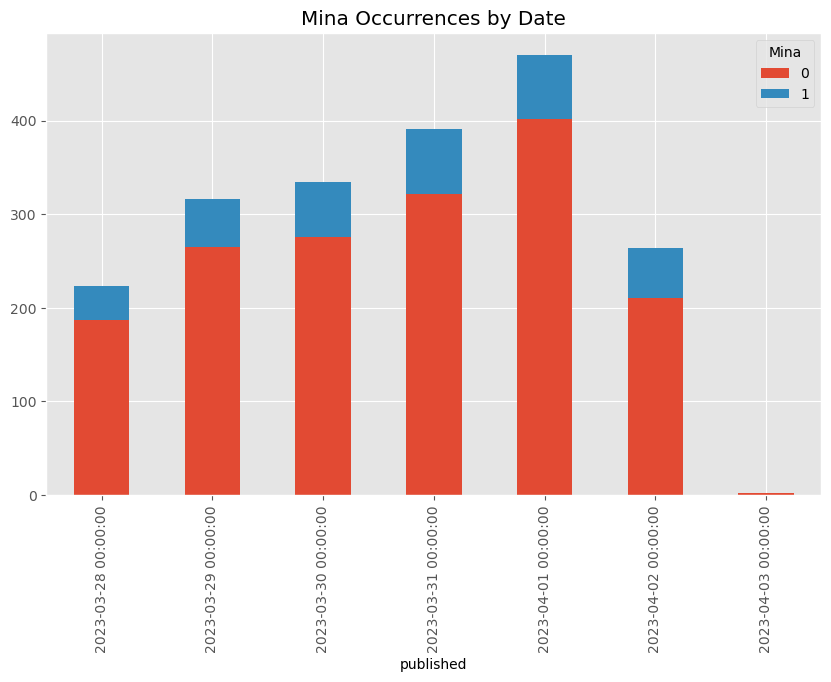

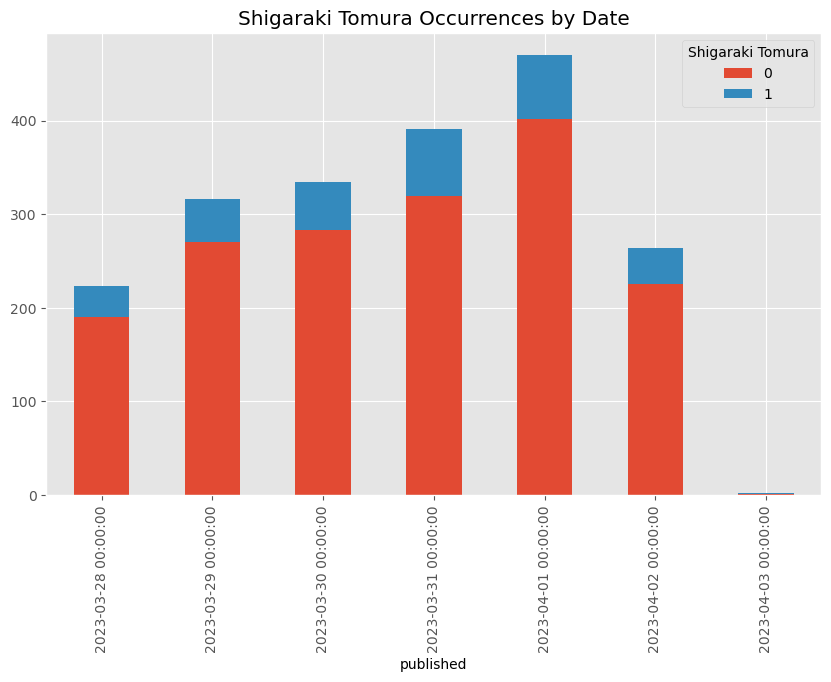

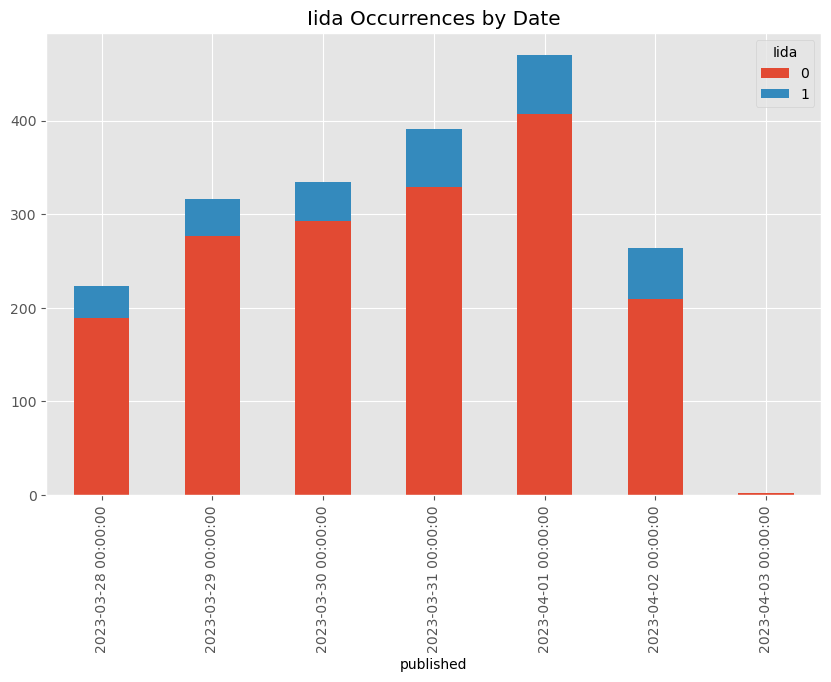

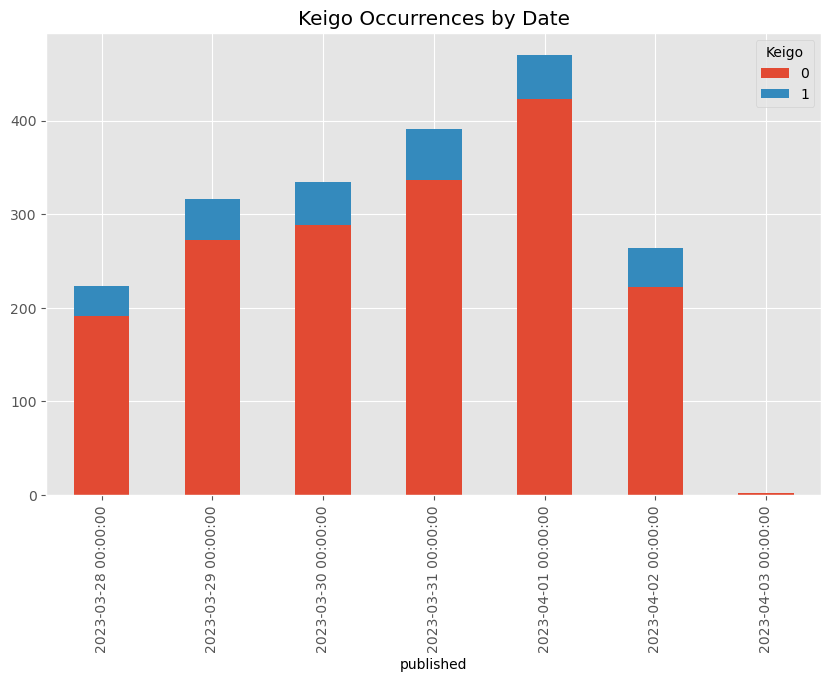

In [22]:
character_presence.groupby(['published', 'Deku']).size().unstack().plot(kind='bar', stacked=True, title='Deku Occurrences by Date')
plt.show()

character_presence.groupby(['published', 'Bakugo']).size().unstack().plot(kind='bar', stacked=True, title='Bakugo Occurrences by Date')
plt.show()

character_presence.groupby(['published', 'Aizawa']).size().unstack().plot(kind='bar', stacked=True, title='Aizawa Occurrences by Date')
plt.show()

character_presence.groupby(['published', 'Shoto']).size().unstack().plot(kind='bar', stacked=True, title='Shoto Occurrences by Date')
plt.show()

character_presence.groupby(['published', 'All Might']).size().unstack().plot(kind='bar', stacked=True, title='All Might Occurrences by Date')
plt.show()

character_presence.groupby(['published', 'Uraraka']).size().unstack().plot(kind='bar', stacked=True, title='Uraraka Occurrences by Date')
plt.show()

character_presence.groupby(['published', 'Shinsou']).size().unstack().plot(kind='bar', stacked=True, title='Shinsou Occurrences by Date')
plt.show()

character_presence.groupby(['published', 'Denki']).size().unstack().plot(kind='bar', stacked=True, title='Denki Occurrences by Date')
plt.show()

character_presence.groupby(['published', 'Inko']).size().unstack().plot(kind='bar', stacked=True, title='Inko Occurrences by Date')
plt.show()

character_presence.groupby(['published', 'Prez Mic']).size().unstack().plot(kind='bar', stacked=True, title='Prez Mic Occurrences by Date')
plt.show()

character_presence.groupby(['published', 'Dabi']).size().unstack().plot(kind='bar', stacked=True, title='Dabi Occurrences by Date')
plt.show()

character_presence.groupby(['published', 'Mina']).size().unstack().plot(kind='bar', stacked=True, title='Mina Occurrences by Date')
plt.show()

character_presence.groupby(['published', 'Shigaraki Tomura']).size().unstack().plot(kind='bar', stacked=True, title='Shigaraki Tomura Occurrences by Date')
plt.show()

character_presence.groupby(['published', 'Iida']).size().unstack().plot(kind='bar', stacked=True, title='Iida Occurrences by Date')
plt.show()

character_presence.groupby(['published', 'Keigo']).size().unstack().plot(kind='bar', stacked=True, title='Keigo Occurrences by Date')
plt.show()

ValueError: The truth value of a DatetimeIndex is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

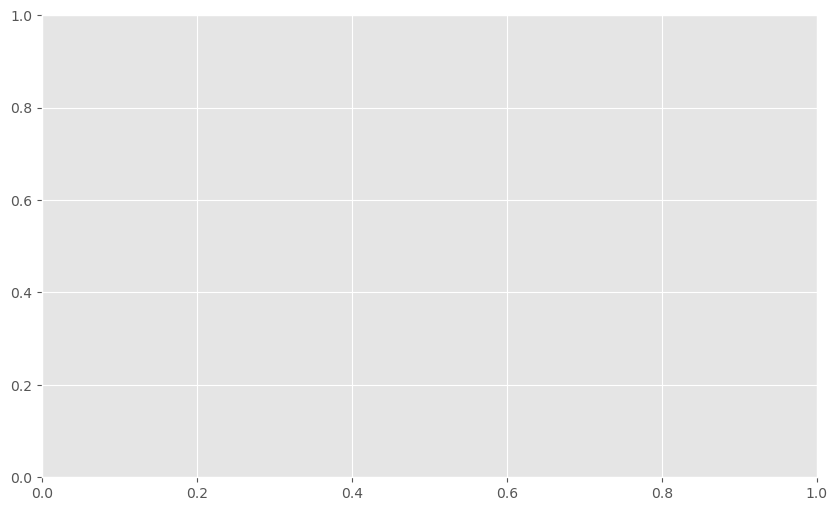

In [23]:
plt.scatter(x='Deku', y=character_presence.index, data=character_presence)